In [2]:
pip install opencv-python

     --------------------------------------- 35.6/35.6 MB 10.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
# importing libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# reading the image data from desired directory
img = cv2.imread("dataverse_files\HAM10000_segmentations_lesion_tschandl\HAM10000_segmentations_lesion_tschandl\ISIC_0024306_segmentation.png")
img.shape

(450, 600, 3)

In [3]:

# reading the image data from desired directory
img = cv2.imread("dataverse_files\HAM10000_segmentations_lesion_tschandl\HAM10000_segmentations_lesion_tschandl\ISIC_0025279_segmentation.png")
img.shape

(450, 600, 3)

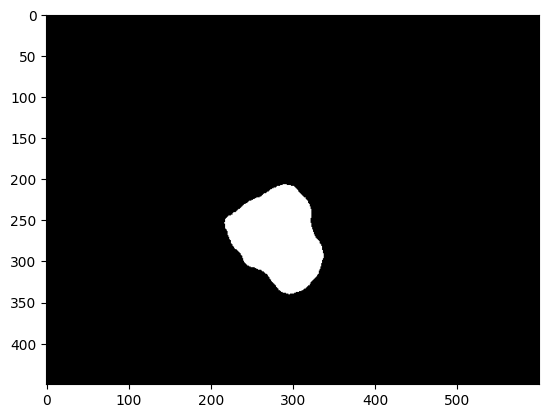

In [4]:
plt.imshow(img)

In [5]:
  
# counting the number of pixels
number_of_white_pix = np.sum(img == 255)
number_of_black_pix = np.sum(img == 0)
  
print('Number of white pixels:', number_of_white_pix)
print('Number of black pixels:', number_of_black_pix)

Number of white pixels: 31167
Number of black pixels: 778833


In [6]:
import glob

In [7]:
basepath = "dataverse_files\HAM10000_segmentations_lesion_tschandl\HAM10000_segmentations_lesion_tschandl\\"

path = glob.glob(basepath+"*.png")

In [8]:
ratio = []
for img in path:
    n = cv2.imread(img)
    wp=np.sum(n == 255)
    bp=np.sum(n == 0)
    ratio.append(wp/(wp+bp))
   

In [9]:
ratio

[0.34277407407407406,
 0.41682592592592593,
 0.3700037037037037,
 0.3564074074074074,
 0.24078518518518519,
 0.2946888888888889,
 0.4305333333333333,
 0.10871851851851852,
 0.10629629629629629,
 0.08441851851851852,
 0.44174074074074077,
 0.36368518518518517,
 0.21752222222222223,
 0.2041814814814815,
 0.3228962962962963,
 0.11850370370370371,
 0.12372962962962963,
 0.3327888888888889,
 0.1318851851851852,
 0.334762962962963,
 0.075,
 0.2796,
 0.4391148148148148,
 0.09427777777777778,
 0.2361925925925926,
 0.2640222222222222,
 0.29005555555555557,
 0.3609703703703704,
 0.2949148148148148,
 0.04974074074074074,
 0.19284444444444446,
 0.18372962962962963,
 0.28788148148148146,
 0.09848518518518519,
 0.22266666666666668,
 0.1771222222222222,
 0.23813333333333334,
 0.32589259259259257,
 0.07089259259259259,
 0.38317407407407406,
 0.17383703703703704,
 0.16967037037037036,
 0.2527740740740741,
 0.40504814814814816,
 0.11878148148148149,
 0.4464111111111111,
 0.07402222222222223,
 0.15434074

C:\Users\asus\AppData\Local\Temp\ipykernel_26952\3598722256.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(ratio,


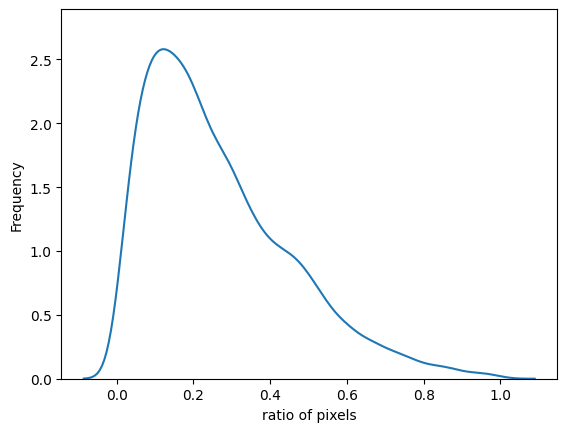

In [10]:
import seaborn as sns
  
# plotting a histogram
ax = sns.distplot(ratio,
                  bins=100,
                  kde=True,
                  #color='none',
                  hist_kws={"linewidth": 15,'alpha':0})
ax.set(xlabel='ratio of pixels', ylabel='Frequency')
 
plt.show()

### Distribution of each class

In [15]:
import pandas as pd 

skin_df = pd.read_csv('dataverse_files\HAM10000_metadata')

In [16]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern


In [17]:
skin_df['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [18]:
skin_df['image_id_seg'] =skin_df['image_id']+"_segmentation.png"

In [19]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,image_id_seg
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,ISIC_0027419_segmentation.png
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,ISIC_0025030_segmentation.png
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,ISIC_0026769_segmentation.png
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,ISIC_0025661_segmentation.png
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,ISIC_0031633_segmentation.png
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern,ISIC_0033084_segmentation.png
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern,ISIC_0033550_segmentation.png
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern,ISIC_0033536_segmentation.png
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern,ISIC_0032854_segmentation.png


In [20]:
df_nv = skin_df[skin_df['dx']=='nv']
df_mel = skin_df[skin_df['dx']=='mel']
df_bkl = skin_df[skin_df['dx']=='bkl']
df_bcc = skin_df[skin_df['dx']=='bcc']
df_akiec = skin_df[skin_df['dx']=='akiec']
df_vasc = skin_df[skin_df['dx']=='vasc']
df_df = skin_df[skin_df['dx']=='df']

In [21]:
df_nv.shape

(6705, 9)

In [22]:
df_array = ['nv','mel', 'bkl', 'bcc', 'akiec', 'vasc', 'df']

In [23]:
def get_proportion_of_whitepixels(img_path):
    n = cv2.imread(img_path)
    wp=np.sum(n == 255)
    bp=np.sum(n == 0)
    return (wp/(wp+bp))

In [24]:
basepath = "dataverse_files\HAM10000_segmentations_lesion_tschandl\HAM10000_segmentations_lesion_tschandl\\"
proportion_dict = {}
for cl in df_array:
    df= skin_df[skin_df['dx']==cl]
    ratio = []
    for i, row in df.iterrows():
        ratio.append(get_proportion_of_whitepixels(os.path.join(basepath, row['image_id_seg'])))
    proportion_dict[cl] = ratio
    

In [25]:
proportion_dict.keys()

dict_keys(['nv', 'mel', 'bkl', 'bcc', 'akiec', 'vasc', 'df'])

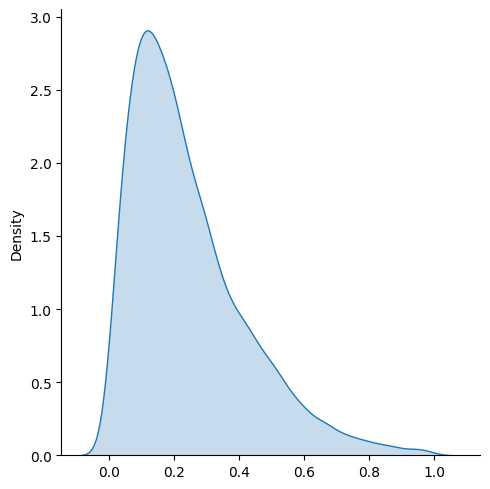

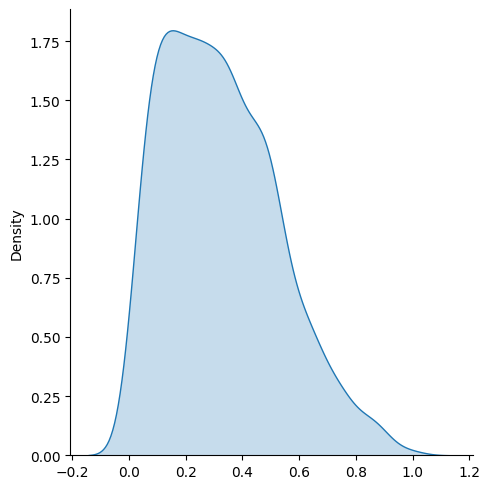

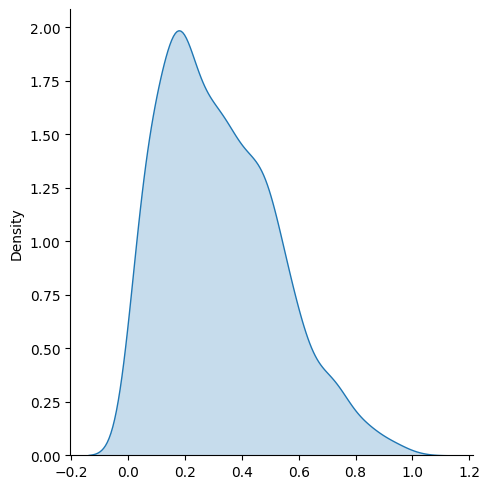

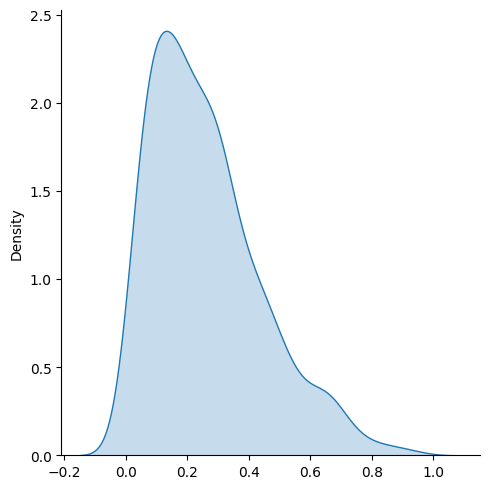

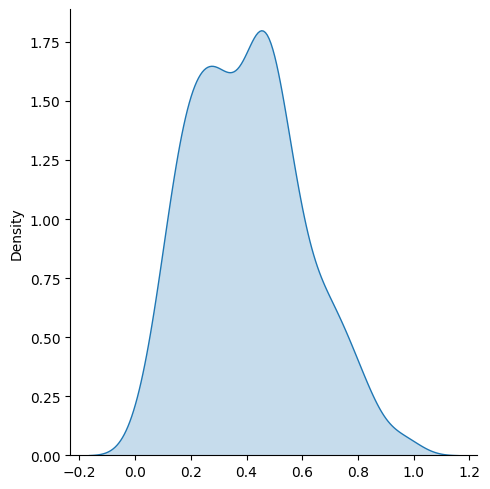

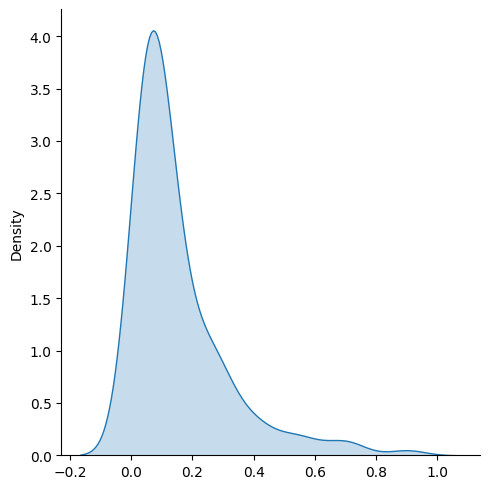

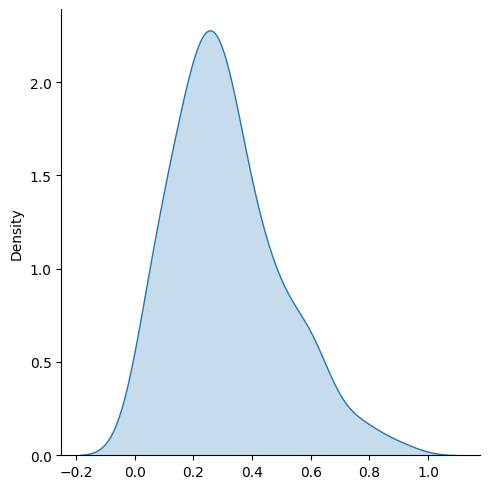

In [26]:
for cl in proportion_dict.keys():
    sns.displot(proportion_dict[cl], kind="kde", fill=True)
    #sns.displot(proportion_dict[cl], bins=100,kde=True, hist_kws={"linewidth": 15,'alpha':0} ) 
    #break;

In [28]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

TypeError: __init__() got an unexpected keyword argument 'linewidth'

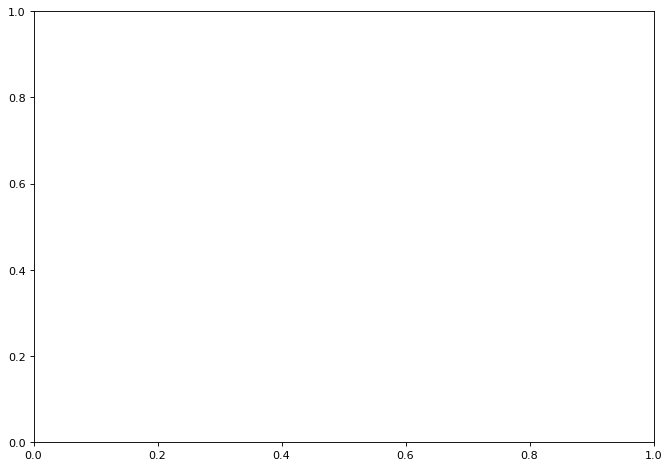

In [34]:
plt.figure(figsize=(10,7), dpi= 80)
sns.histplot(proportion_dict['nv'], color="dodgerblue", label='nv',kde=True, hist_kws={'alpha':0}, kde_kws={'linewidth':2})
sns.histplot(proportion_dict['mel'], color="r", label='mel',kde=True, hist_kws={'alpha':0}, kde_kws={'linewidth':2})
sns.histplot(proportion_dict['bkl'], color="g", label='bkl',kde=True, hist_kws={'alpha':0}, kde_kws={'linewidth':2})
sns.histplot(proportion_dict['bcc'], color="yellow", label='bcc',kde=True, hist_kws={'alpha':0}, kde_kws={'linewidth':2})
sns.histplot(proportion_dict['akiec'], color="orange", label='akiec',kde=True, hist_kws={'alpha':0}, kde_kws={'linewidth':2})
sns.histplot(proportion_dict['vasc'], color="pink", label='vasc',kde=True, hist_kws={'alpha':0}, kde_kws={'linewidth':2})
sns.histplot(proportion_dict['df'], color="gold", label='df',kde=True, hist_kws={'alpha':0}, kde_kws={'linewidth':2})
plt.legend()
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_26952\1648813971.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(proportion_dict['nv'], color="dodgerblue", label='nv',kde=True, hist_kws={'alpha':0}, kde_kws={'linewidth':2})
C:\Users\asus\AppData\Local\Temp\ipykernel_26952\1648813971.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2

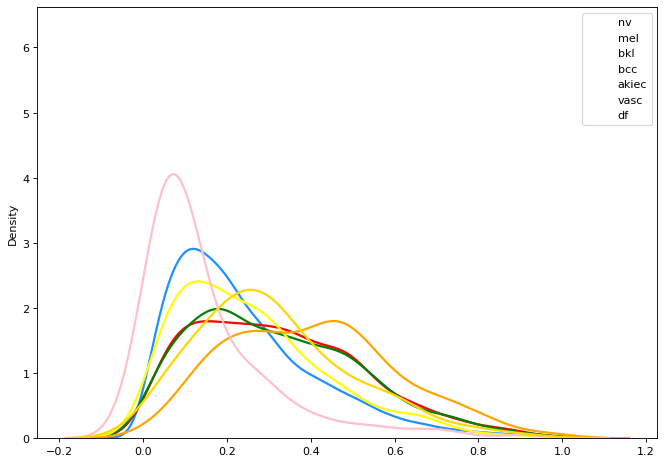

In [35]:
#kwargs = dict()

plt.figure(figsize=(10,7), dpi= 80)
#for cl in proportion_dict.keys():
sns.distplot(proportion_dict['nv'], color="dodgerblue", label='nv',kde=True, hist_kws={'alpha':0}, kde_kws={'linewidth':2})
sns.distplot(proportion_dict['mel'], color="r", label='mel',kde=True, hist_kws={'alpha':0}, kde_kws={'linewidth':2})
sns.distplot(proportion_dict['bkl'], color="g", label='bkl',kde=True, hist_kws={'alpha':0}, kde_kws={'linewidth':2})
sns.distplot(proportion_dict['bcc'], color="yellow", label='bcc',kde=True, hist_kws={'alpha':0}, kde_kws={'linewidth':2})
sns.distplot(proportion_dict['akiec'], color="orange", label='akiec',kde=True, hist_kws={'alpha':0}, kde_kws={'linewidth':2})
sns.distplot(proportion_dict['vasc'], color="pink", label='vasc',kde=True, hist_kws={'alpha':0}, kde_kws={'linewidth':2})
sns.distplot(proportion_dict['df'], color="gold", label='df',kde=True, hist_kws={'alpha':0}, kde_kws={'linewidth':2})
               
#sns.distplot(x2, color="orange", label="SUV", **kwargs)
#sns.distplot(x3, color="deeppink", label="minivan", **kwargs)
#plt.xlim(50,75)
plt.legend()
plt.show()

### Approach 2

#### considering only the number of white pixels

In [106]:
def get_number_of_whitepixels(img_path):
    n = cv2.imread(img_path)
    wp=np.sum(n == 255)
    return wp

In [107]:
basepath = "D:\Sakthi\dataverse_files\HAM10000_segmentations_lesion_tschandl\HAM10000_segmentations_lesion_tschandl\\"
wp_dict = {}
for cl in df_array:
    df= skin_df[skin_df['dx']==cl]
    wp_array = []
    for i, row in df.iterrows():
        wp_array.append(get_number_of_whitepixels(os.path.join(basepath, row['image_id_seg'])))
    wp_dict[cl] = wp_array

In [108]:
from sklearn import preprocessing

In [109]:
for cl in df_array:
    wp_dict[cl] =  preprocessing.normalize([wp_dict[cl]])
    

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

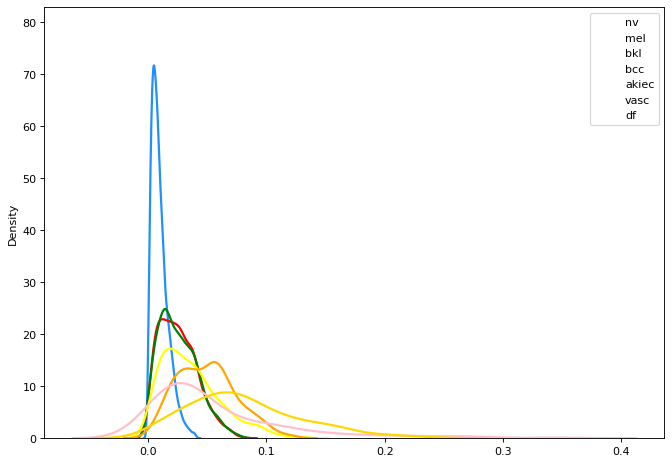

In [110]:
plt.figure(figsize=(10,7), dpi= 80)
#for cl in proportion_dict.keys():
sns.distplot(wp_dict['nv'], color="dodgerblue", label='nv',kde=True, hist_kws={'alpha':0}, kde_kws={'linewidth':2})
sns.distplot(wp_dict['mel'], color="r", label='mel',kde=True, hist_kws={'alpha':0}, kde_kws={'linewidth':2})
sns.distplot(wp_dict['bkl'], color="g", label='bkl',kde=True, hist_kws={'alpha':0}, kde_kws={'linewidth':2})
sns.distplot(wp_dict['bcc'], color="yellow", label='bcc',kde=True, hist_kws={'alpha':0}, kde_kws={'linewidth':2})
sns.distplot(wp_dict['akiec'], color="orange", label='akiec',kde=True, hist_kws={'alpha':0}, kde_kws={'linewidth':2})
sns.distplot(wp_dict['vasc'], color="pink", label='vasc',kde=True, hist_kws={'alpha':0}, kde_kws={'linewidth':2})
sns.distplot(wp_dict['df'], color="gold", label='df',kde=True, hist_kws={'alpha':0}, kde_kws={'linewidth':2})
plt.legend()
plt.show()

### WP proportions and number of WP as columns in the data frame

In [111]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,image_id_seg
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,ISIC_0027419_segmentation.png
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,ISIC_0025030_segmentation.png
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,ISIC_0026769_segmentation.png
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,ISIC_0025661_segmentation.png
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,ISIC_0031633_segmentation.png
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern,ISIC_0033084_segmentation.png
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern,ISIC_0033550_segmentation.png
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern,ISIC_0033536_segmentation.png
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern,ISIC_0032854_segmentation.png


In [130]:
basepath = "D:\Sakthi\dataverse_files\HAM10000_segmentations_lesion_tschandl\HAM10000_segmentations_lesion_tschandl\\"
skin_df['wp_count'] = None
skin_df['wp_proportion'] = None

In [131]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,image_id_seg,wp_count,wp_proportion
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,ISIC_0027419_segmentation.png,None,None
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,ISIC_0025030_segmentation.png,None,None
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,ISIC_0026769_segmentation.png,None,None
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,ISIC_0025661_segmentation.png,None,None
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,ISIC_0031633_segmentation.png,None,None
...,...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern,ISIC_0033084_segmentation.png,None,None
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern,ISIC_0033550_segmentation.png,None,None
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern,ISIC_0033536_segmentation.png,None,None
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern,ISIC_0032854_segmentation.png,None,None


In [135]:
#path = glob.glob(basepath+"*.png")

for i, row in skin_df.iterrows():
    path = os.path.join(basepath, row['image_id_seg'])
    n = cv2.imread(path)
    wp=np.sum(n == 255)
    bp=np.sum(n == 0)
    skin_df.loc[i,'wp_count'] = wp
    skin_df.loc[i, 'wp_proportion'] = wp/(wp+bp)

In [136]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,image_id_seg,wp_count,wp_proportion
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,ISIC_0027419_segmentation.png,255999,0.316048
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,ISIC_0025030_segmentation.png,96978,0.119726
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,ISIC_0026769_segmentation.png,216363,0.267115
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,ISIC_0025661_segmentation.png,64239,0.079307
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,ISIC_0031633_segmentation.png,308802,0.381237
...,...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern,ISIC_0033084_segmentation.png,439944,0.543141
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern,ISIC_0033550_segmentation.png,161562,0.199459
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern,ISIC_0033536_segmentation.png,237147,0.292774
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern,ISIC_0032854_segmentation.png,411270,0.507741


In [143]:
extracted_df = skin_df[['age', 'sex', 'localization','dx_type', 'wp_count', 'wp_proportion', 'dx',]]

In [144]:
extracted_df

,age,sex,localization,dx_type,wp_count,wp_proportion,dx
0,80.0,male,scalp,histo,255999,0.316048,bkl
1,80.0,male,scalp,histo,96978,0.119726,bkl
2,80.0,male,scalp,histo,216363,0.267115,bkl
3,80.0,male,scalp,histo,64239,0.079307,bkl
4,75.0,male,ear,histo,308802,0.381237,bkl
...,...,...,...,...,...,...,...
10010,40.0,male,abdomen,histo,439944,0.543141,akiec
10011,40.0,male,abdomen,histo,161562,0.199459,akiec
10012,40.0,male,abdomen,histo,237147,0.292774,akiec
10013,80.0,male,face,histo,411270,0.507741,akiec


In [145]:
extracted_df = pd.get_dummies(extracted_df, columns = ['sex', 'localization', 'dx_type'])

In [151]:
extracted_df.isnull().values.any()

True

In [152]:
extracted_df.isnull().sum()

age                             57
wp_count                         0
wp_proportion                    0
dx                               0
sex_female                       0
sex_male                         0
sex_unknown                      0
localization_abdomen             0
localization_acral               0
localization_back                0
localization_chest               0
localization_ear                 0
localization_face                0
localization_foot                0
localization_genital             0
localization_hand                0
localization_lower extremity     0
localization_neck                0
localization_scalp               0
localization_trunk               0
localization_unknown             0
localization_upper extremity     0
dx_type_confocal                 0
dx_type_consensus                0
dx_type_follow_up                0
dx_type_histo                    0
dtype: int64

In [154]:
extracted_df = extracted_df.dropna()

In [155]:
extracted_df.isnull().values.any()

False

### KNN

In [148]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

In [157]:
y= extracted_df[["dx"]]
X = extracted_df.drop('dx', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size = 0.2, random_state = 1)

In [158]:
#Checking with KNN

clf = KNeighborsClassifier(n_neighbors = 7)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

C:\Users\asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.6164658634538153


In [161]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, target_names = y.dx.unique())
print(report)

              precision    recall  f1-score   support

         bkl       0.11      0.03      0.05        62
          nv       0.00      0.00      0.00        99
          df       0.11      0.04      0.05       217
         mel       0.00      0.00      0.00        40
        vasc       0.14      0.04      0.07       225
         bcc       0.67      0.92      0.77      1314
       akiec       0.00      0.00      0.00        35

    accuracy                           0.62      1992
   macro avg       0.14      0.15      0.13      1992
weighted avg       0.47      0.62      0.52      1992



C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest

In [162]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

C:\Users\asus\AppData\Local\Temp\ipykernel_16884\2241537399.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


In [164]:
report = classification_report(y_test, y_pred, target_names = y.dx.unique())
print(report)

              precision    recall  f1-score   support

         bkl       0.30      0.27      0.29        62
          nv       0.18      0.19      0.18        99
          df       0.47      0.47      0.47       217
         mel       0.45      0.12      0.20        40
        vasc       0.33      0.25      0.28       225
         bcc       0.84      0.91      0.87      1314
       akiec       0.61      0.31      0.42        35

    accuracy                           0.70      1992
   macro avg       0.45      0.36      0.39      1992
weighted avg       0.68      0.70      0.69      1992



### Gaussian Naive Bayes


In [165]:
from sklearn.naive_bayes import GaussianNB

In [167]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, target_names = y.dx.unique())
print(report)

              precision    recall  f1-score   support

         bkl       0.20      0.02      0.03        62
          nv       0.00      0.00      0.00        99
          df       0.35      0.18      0.24       217
         mel       0.00      0.00      0.00        40
        vasc       0.15      0.01      0.02       225
         bcc       0.69      0.98      0.81      1314
       akiec       0.00      0.00      0.00        35

    accuracy                           0.67      1992
   macro avg       0.20      0.17      0.16      1992
weighted avg       0.52      0.67      0.56      1992



C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: 